In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pynamicalsys import DiscreteDynamicalSystem as dds

In [2]:
ds = dds(model="extended standard nontwist map")

In [11]:
ds.info

{'description': 'Extended version of standard nontwist map',
 'has_jacobian': True,
 'has_backwards_map': True,
 'mapping': CPUDispatcher(<function extended_standard_nontwist_map at 0x12548aac0>),
 'jacobian': CPUDispatcher(<function extended_standard_nontwist_map_jacobian at 0x12548afc0>),
 'backwards_mapping': CPUDispatcher(<function extended_standard_nontwist_map_backwards at 0x12548ad40>),
 'dimension': 2,
 'number_of_parameters': 4,
 'parameters': ['a', 'b', 'c', 'm']}

In [33]:
a = 0.805
b = 0.597
c = 0.005
ms = [1, 2, 3, 4]
num_ic = 1000000
total_time = 5000

In [34]:
np.random.seed(13)
x = np.random.rand(num_ic)
y = np.zeros_like(x)
u = np.stack([x, y]).T

In [35]:
averages = []
cumul_averages = []
for i in range(len(ms)):
    parameters = [a, b, c, ms[i]]
    average = ds.average_in_time(u, total_time, parameters=parameters)
    averages.append(average)
    cumul_average = ds.cumulative_average(u, total_time, parameters=parameters)
    cumul_averages.append(cumul_average)

(-2.0, 2.0)

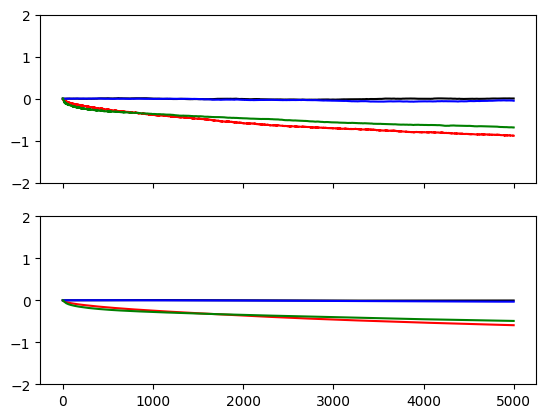

In [37]:
fig, ax = plt.subplots(2, 1, sharex=True)
colors = ["k", "r", "b", "g"]
for i in range(len(ms)):
    ax[0].plot(averages[i], c=colors[i])
    ax[1].plot(cumul_averages[i], c=colors[i])
ax[0].set_ylim(-2, 2)
ax[1].set_ylim(-2, 2)

In [3]:
a = 0.805
b = 0.597
c = 0.005
m = 1
parameters = [a, b, c, m]
num_ic = 100000
total_time = 5000
sample_times = np.array(np.unique(
    np.logspace(np.log10(1), np.log10(total_time), 100).astype(int)
), dtype=np.int64)
sample_times

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   17,   18,   20,   22,   24,   26,   28,
         31,   34,   37,   40,   44,   48,   52,   57,   62,   67,   73,
         80,   87,   95,  104,  113,  123,  134,  146,  160,  174,  190,
        207,  225,  246,  268,  292,  318,  347,  378,  412,  449,  489,
        533,  581,  634,  691,  753,  820,  894,  975, 1062, 1158, 1262,
       1375, 1499, 1633, 1780, 1940, 2115, 2305, 2512, 2737, 2983, 3252,
       3544, 3862, 4209, 4587, 4999])

In [4]:
sample_times[1]

np.int64(2)

In [4]:
np.random.seed(13)
x = np.random.rand(num_ic)
y = np.zeros_like(x)
u = np.stack([x, y]).T

In [8]:
%%time
ds.average_in_time(u, total_time, parameters=parameters)

CPU times: user 47.8 s, sys: 2.13 s, total: 50 s
Wall time: 7.12 s


array([ 0.00089773, -0.00016204,  0.00022524, ...,  0.00811202,
        0.00950214,  0.00692856], shape=(5000,))

In [7]:
%%time
ds.average_in_time(u, total_time, parameters=parameters, sample_times=sample_times)

CPU times: user 46.9 s, sys: 1.51 s, total: 48.4 s
Wall time: 7.27 s


array([ 8.97729617e-04, -1.62037072e-04,  2.25236456e-04,  1.30819412e-03,
        4.36714097e-04,  2.38731752e-04,  1.67225092e-03,  1.53920431e-03,
        8.58618574e-04,  6.60613035e-04,  1.77738450e-03,  1.80342079e-03,
        2.99277415e-04,  4.21314493e-05,  1.12046819e-03,  1.30362560e-03,
        2.48950162e-03,  1.71338186e-03, -1.91845431e-04, -4.26417013e-03,
       -5.52336223e-03, -5.99395008e-03, -5.92903075e-03, -5.19931853e-03,
       -5.17255902e-03, -4.68166488e-03, -4.10688802e-03, -5.77402099e-05,
       -2.43684193e-03, -4.41275112e-03, -1.07278439e-02, -4.44154386e-03,
       -5.61883874e-03, -7.31158640e-03, -1.21891975e-02, -9.81771607e-03,
       -1.00142093e-02, -1.08736652e-02, -1.58375447e-02, -1.37866809e-02,
       -9.57739813e-03, -5.01826441e-03, -6.42193406e-03, -1.88068230e-03,
       -3.15145492e-03, -6.98684605e-03, -1.28633326e-02, -2.64546153e-02,
       -2.59278011e-02, -3.15855074e-02, -4.37088630e-02, -3.09230896e-02,
       -1.74764278e-02, -

In [6]:
%%time
ds.average_in_time(u, total_time, parameters=parameters)

CPU times: user 44.9 s, sys: 2.1 s, total: 47 s
Wall time: 7.17 s


array([ 0.00089773, -0.00016204,  0.00022524, ...,  0.00811202,
        0.00950214,  0.00692856], shape=(5000,))

In [7]:
%%time
ds.average_in_time(u, total_time, parameters=parameters, sample_times=sample_times)

CPU times: user 47.5 s, sys: 1.71 s, total: 49.2 s
Wall time: 7.98 s


array([ 8.97729617e-04, -1.62037072e-04,  2.25236456e-04,  1.30819412e-03,
        4.36714097e-04,  2.38731752e-04,  1.67225092e-03,  1.53920431e-03,
        8.58618574e-04,  6.60613035e-04,  1.77738450e-03,  1.80342079e-03,
        2.99277415e-04,  4.21314493e-05,  1.12046819e-03,  1.30362560e-03,
        2.48950162e-03,  1.71338186e-03, -1.91845431e-04, -4.26417013e-03,
       -5.52336223e-03, -5.99395008e-03, -5.92903075e-03, -5.19931853e-03,
       -5.17255902e-03, -4.68166488e-03, -4.10688802e-03, -5.77402099e-05,
       -2.43684193e-03, -4.41275112e-03, -1.07278439e-02, -4.44154386e-03,
       -5.61883874e-03, -7.31158640e-03, -1.21891975e-02, -9.81771607e-03,
       -1.00142093e-02, -1.08736652e-02, -1.58375447e-02, -1.37866809e-02,
       -9.57739813e-03, -5.01826441e-03, -6.42193406e-03, -1.88068230e-03,
       -3.15145492e-03, -6.98684605e-03, -1.28633326e-02, -2.64546153e-02,
       -2.59278011e-02, -3.15855074e-02, -4.37088630e-02, -3.09230896e-02,
       -1.74764278e-02, -

In [10]:
%%time
ds.cumulative_average(u, total_time, parameters=parameters)

CPU times: user 45.5 s, sys: 2.9 s, total: 48.4 s
Wall time: 7.32 s


array([ 0.00089773,  0.00036785,  0.00032031, ..., -0.02556341,
       -0.0255564 , -0.0255499 ], shape=(5000,))

In [11]:
%%time
ds.cumulative_average(u, total_time, parameters=parameters, sample_times=sample_times)

CPU times: user 47.8 s, sys: 2.25 s, total: 50.1 s
Wall time: 7.91 s


array([ 8.97729617e-04,  3.67846273e-04,  3.20309667e-04,  5.67280781e-04,
        5.41167444e-04,  4.90761495e-04,  6.59545699e-04,  7.69503025e-04,
        7.79404752e-04,  7.67525581e-04,  8.59330937e-04,  9.38005091e-04,
        8.88872193e-04,  8.28390711e-04,  8.47862543e-04,  8.70316191e-04,
        9.60270937e-04,  1.10572971e-03,  1.05036182e-03,  7.54213491e-04,
        2.87970742e-04, -6.75631880e-05, -5.94025120e-04, -1.03514501e-03,
       -1.39163283e-03, -1.60427444e-03, -1.81204781e-03, -1.78418776e-03,
       -1.80681346e-03, -1.94307351e-03, -2.47558974e-03, -2.82299379e-03,
       -3.08982598e-03, -3.34634559e-03, -3.72990688e-03, -4.32551063e-03,
       -4.68178214e-03, -4.89643988e-03, -5.69182240e-03, -6.43063592e-03,
       -6.85223390e-03, -6.87247465e-03, -6.63494978e-03, -6.51162701e-03,
       -6.10446200e-03, -6.01803385e-03, -6.27240931e-03, -7.40211764e-03,
       -8.87984536e-03, -1.04126230e-02, -1.25240972e-02, -1.42570199e-02,
       -1.51189798e-02, -

In [11]:
%%time
ds.cumulative_average(u, total_time, parameters=parameters)

CPU times: user 45.8 s, sys: 3.04 s, total: 48.8 s
Wall time: 8.51 s


array([ 0.00089773,  0.00036785,  0.00032031, ..., -0.02556341,
       -0.0255564 , -0.0255499 ], shape=(5000,))

In [12]:
%%time
ds.cumulative_average(u, total_time, parameters=parameters, sample_times=sample_times)

CPU times: user 48.2 s, sys: 2.41 s, total: 50.6 s
Wall time: 7.89 s


array([ 8.97729617e-04,  3.67846273e-04,  3.20309667e-04,  5.67280781e-04,
        5.41167444e-04,  4.90761495e-04,  6.59545699e-04,  7.69503025e-04,
        7.79404752e-04,  7.67525581e-04,  8.59330937e-04,  9.38005091e-04,
        8.88872193e-04,  8.28390711e-04,  8.47862543e-04,  8.70316191e-04,
        9.60270937e-04,  1.10572971e-03,  1.05036182e-03,  7.54213491e-04,
        2.87970742e-04, -6.75631880e-05, -5.94025120e-04, -1.03514501e-03,
       -1.39163283e-03, -1.60427444e-03, -1.81204781e-03, -1.78418776e-03,
       -1.80681346e-03, -1.94307351e-03, -2.47558974e-03, -2.82299379e-03,
       -3.08982598e-03, -3.34634559e-03, -3.72990688e-03, -4.32551063e-03,
       -4.68178214e-03, -4.89643988e-03, -5.69182240e-03, -6.43063592e-03,
       -6.85223390e-03, -6.87247465e-03, -6.63494978e-03, -6.51162701e-03,
       -6.10446200e-03, -6.01803385e-03, -6.27240931e-03, -7.40211764e-03,
       -8.87984536e-03, -1.04126230e-02, -1.25240972e-02, -1.42570199e-02,
       -1.51189798e-02, -